In [2]:
from PCA_sklearn import *
import matplotlib.pyplot as plt
from scipy.stats import norm 
from mpl_toolkits.mplot3d import axes3d
colors = ["bo", "mo"]


Ratio:
[0.61069609 0.15902021 0.11518157 0.08212614 0.02930554 0.00367044]
Principal components (each row corresponds to a component, each column to a feature):
[[ 0.47433187 -0.16865268  0.5079431   0.392481    0.46737372  0.34070493]
 [-0.00744727  0.94964363  0.08963474  0.27016635 -0.05908358  0.11664647]
 [ 0.03519482  0.07203572 -0.20375692 -0.52628258  0.0561153   0.81971521]
 [ 0.36937041  0.25373114  0.02885    -0.58940901  0.50388919 -0.44389908]
 [ 0.77934679 -0.01000544 -0.13053641 -0.01860307 -0.61147335 -0.03511387]
 [ 0.17291392 -0.00803152 -0.82132239  0.3850278   0.3835597   0.01006766]]


## plot of qumulative variance explaind by principal components

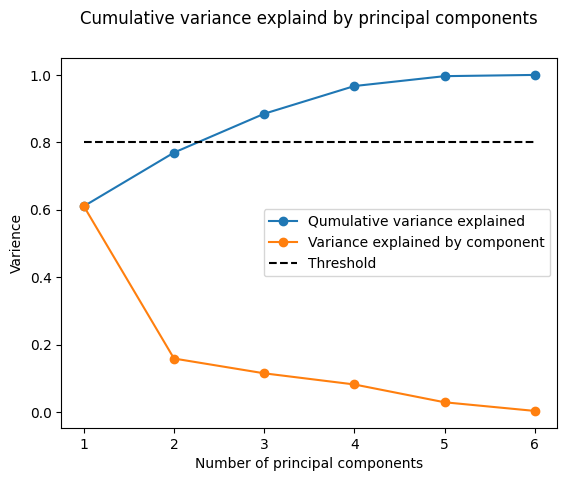

In [3]:
ratio_sum = []
x = range(1, 7)
threshold = [0.8]*6


for indeks, i in enumerate(pca.explained_variance_ratio_):
    if indeks == 0:
        ratio_sum.append(i)
    else:
        ratio_sum.append(i + ratio_sum[-1])

plt.figure()

plt.title("Cumulative variance explaind by principal components", y=1.07)

plt.plot(x, ratio_sum, "o-", label="Qumulative variance explained")
plt.plot(x, pca.explained_variance_ratio_, "o-", label="Variance explained by component")
plt.plot(x, threshold, "k--", label="Threshold")
plt.legend()
plt.xlabel("Number of principal components")
plt.ylabel("Varience")
plt.savefig("plots/cumulative_variance_plot")
plt.show()



## Plots of to check for normality in data

In [4]:
def norm_data_plot(data, label):
    mean = np.mean(data)
    std = np.std(data)
    x_axis = np.linspace(np.min(data), np.max(data), 100)
    
    n, bins, patches = plt.hist(data, bins=20, alpha=0.75, label='Histogram')
    
    
    # Calculate bin width
    bin_width = bins[1] - bins[0]
    
    # Scale PDF by the total count and the bin width
    scaled_pdf = norm.pdf(x_axis, mean, std) * len(data) * bin_width
    
    # Plot the scaled PDF on the second y-axis
    plt.plot(x_axis, scaled_pdf, 'k--', label='Scaled PDF')
    #plt.xlabel("Values")
    #plt.ylabel("Count")
    plt.title(label)


## Data projected onto the principal components

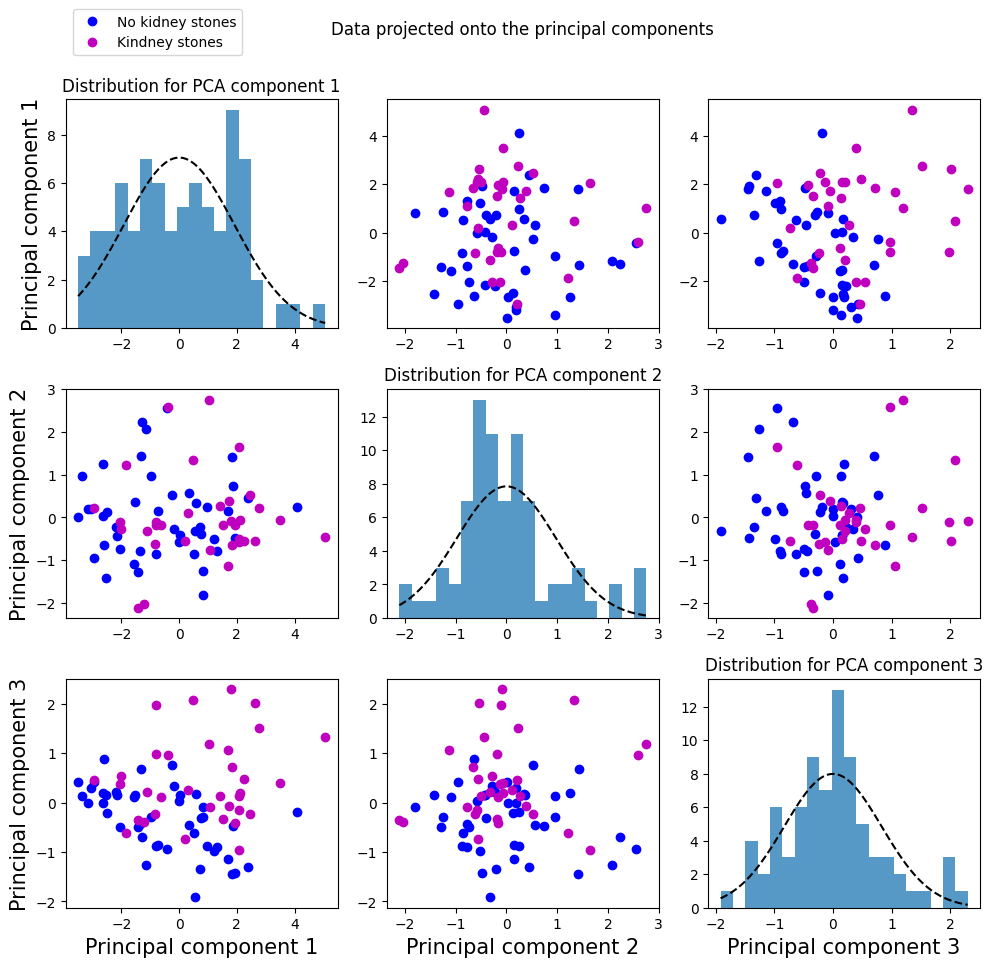

pca1: [ 0.47433187 -0.16865268  0.5079431   0.392481    0.46737372  0.34070493]
pca2: [-0.00744727  0.94964363  0.08963474  0.27016635 -0.05908358  0.11664647]
pca3: [ 0.03519482  0.07203572 -0.20375692 -0.52628258  0.0561153   0.81971521]


In [5]:
proj_data = pca.transform(st_X)
# Indices of the principal components to be plotted
c=0
fig = plt.figure(figsize=(10,10))
plt.title("Data projected onto the principal components", y=1.07)
plt.axis("off")

# Plotting empty lists with specified marker colors and labels for the legend
blue, = plt.plot([], [], 'bo', label='No kidney stones')
magenta, = plt.plot([], [], 'mo', label='Kindney stones')
plt.legend(loc="upper left", bbox_to_anchor=(0, 1.12), handles = [blue, magenta], labels=["No kidney stones", "Kindney stones"])


for j in range(3):
    for k in range(3):
        c+=1
        plt.subplot(3, 3, c)
        if j == k:
            norm_data_plot(proj_data[:,k], f"Distribution for PCA component {j+1}")
        else:
            for i in range(2):
                plt.plot(proj_data[:,k][y==i], proj_data[:,j][y==i], colors[i])
        if j == 2:
           plt.xlabel(f"Principal component {k+1}", fontsize=15)
        if k == 0:
            plt.ylabel(f"Principal component {j+1}", fontsize=15)
        fig.tight_layout()
plt.savefig("plots/PCA_plot")
plt.show()
print(f"pca1: {pca.components_[0]}\npca2: {pca.components_[1]}\npca3: {pca.components_[2]}")


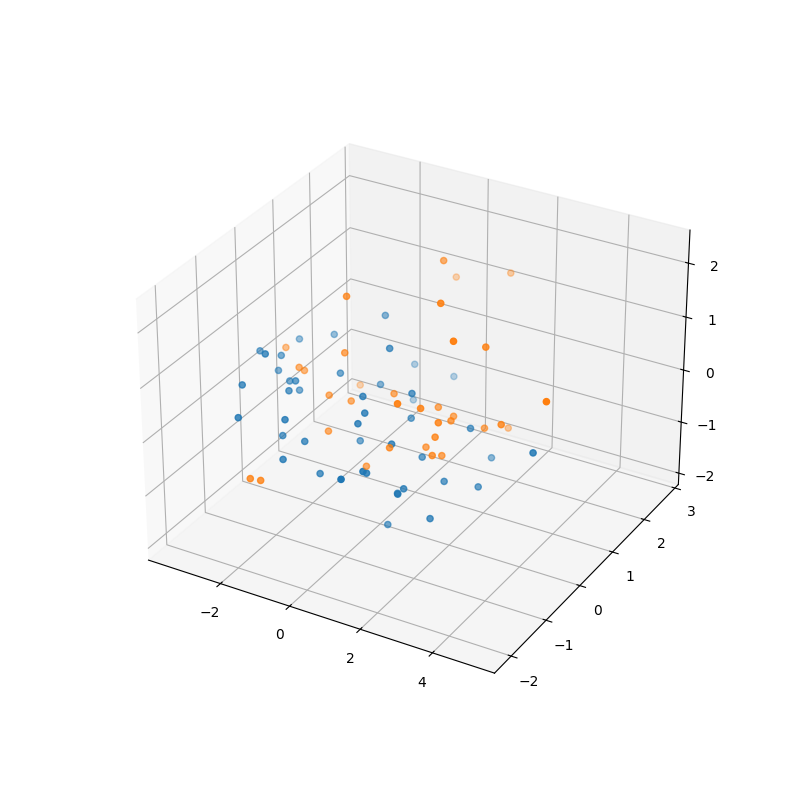

In [6]:
%matplotlib widget
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
for i in range(2):
    ax.scatter(proj_data[:,0][y==i], proj_data[:,1][y==i], proj_data[:,2][y==i])
plt.show()


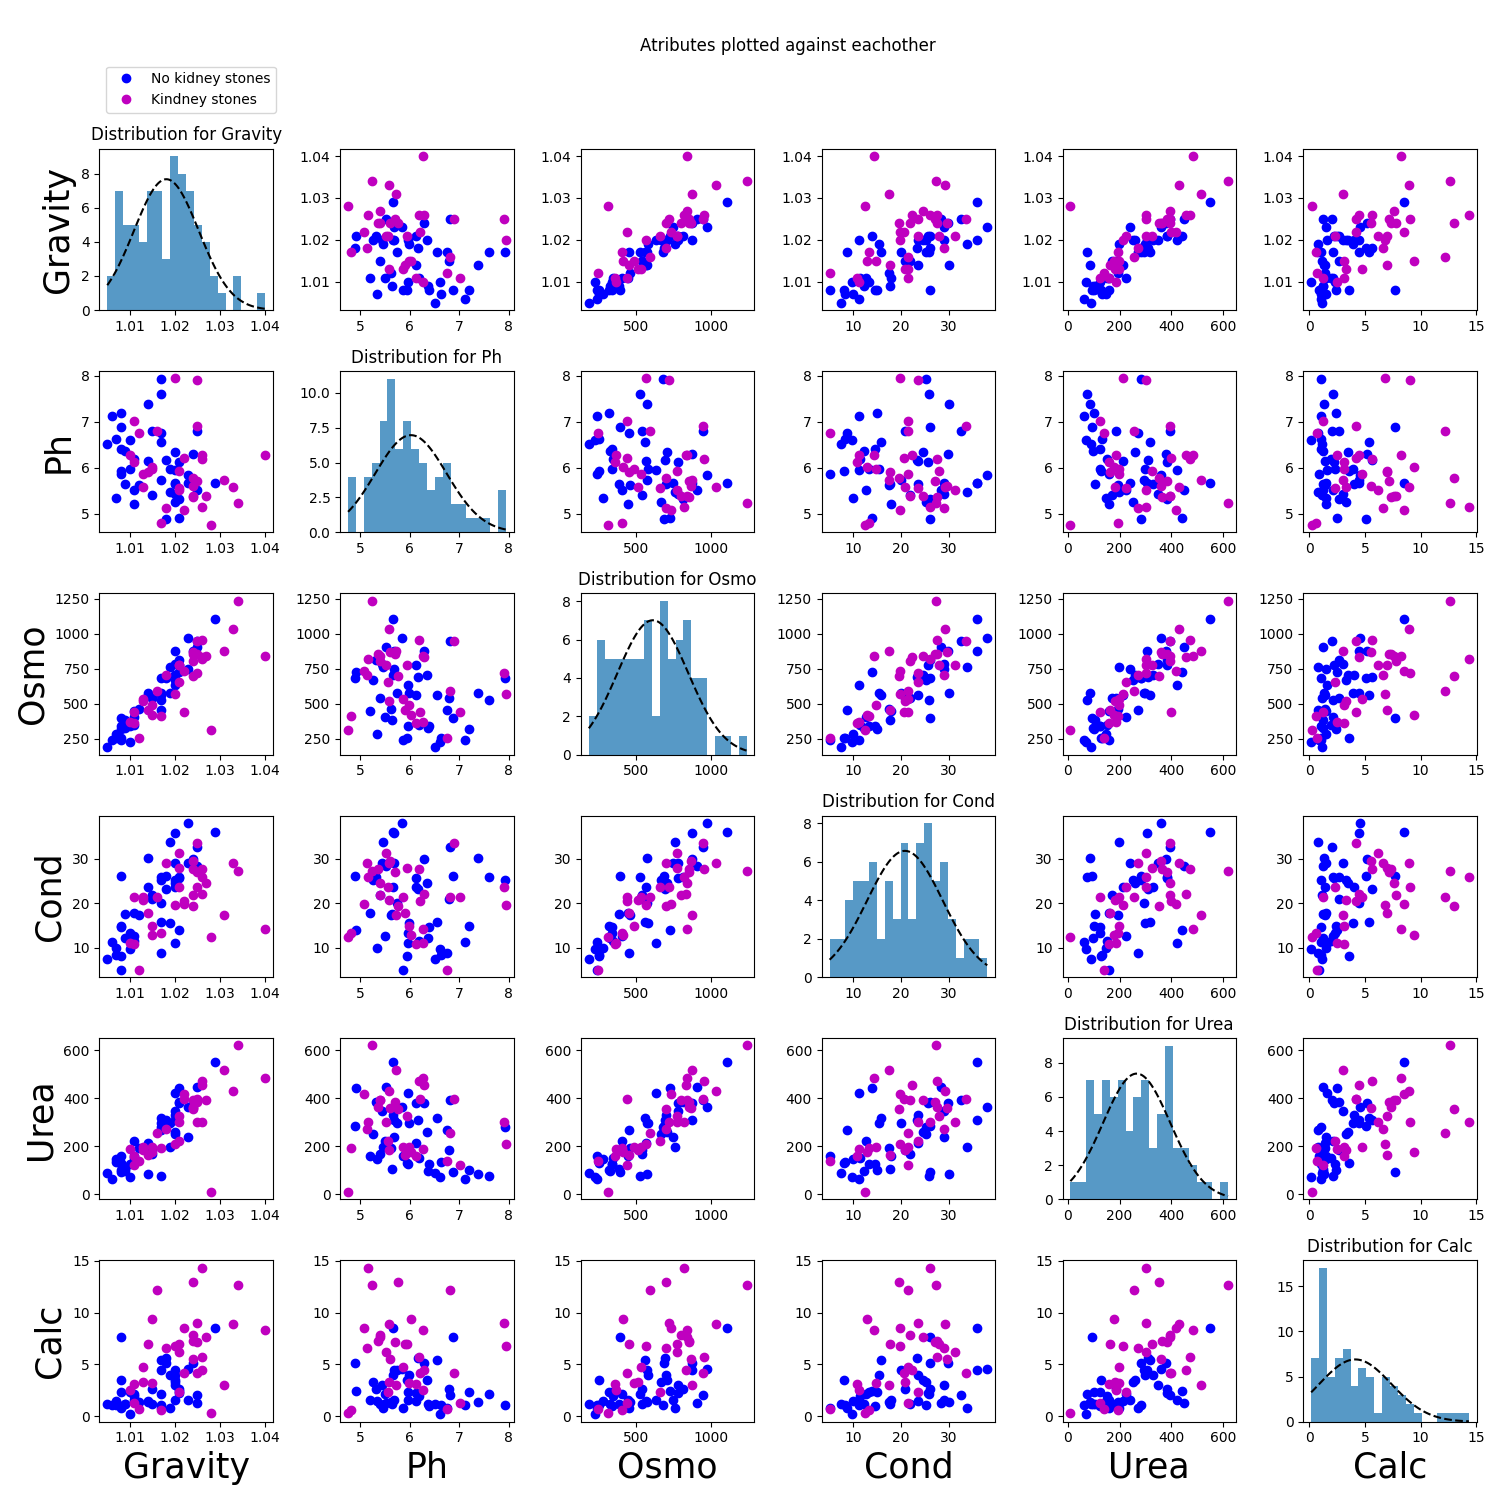

In [7]:
# Indices of the atributes to be plotted
titles = list(data.keys())
c=0

fig = plt.figure(figsize=(15,15))
plt.title("Atributes plotted against eachother", y=1.07)
plt.axis("off")

# Plotting empty lists with specified marker colors and labels for the legend
blue, = plt.plot([], [], 'bo', label='No kidney stones')
magenta, = plt.plot([], [], 'mo', label='Kindney stones')
plt.legend(loc="upper left", bbox_to_anchor=(0, 1.07), handles = [blue, magenta], labels=["No kidney stones", "Kindney stones"])

for j in range(6):
    for k in range(6):
        c+=1
        plt.subplot(6, 6, c)
        if j == k:
            norm_data_plot(np.array(X)[:,j], f"Distribution for {titles[j].capitalize()}")
        else:
            for i in range(2):
                plt.plot(np.array(X)[:,k][y==i], np.array(X)[:,j][y==i], colors[i])
            
        if j == 5:
           plt.xlabel(titles[k].capitalize(), fontsize=25)
        if k == 0:
            plt.ylabel(titles[j].capitalize(), fontsize=25)
        fig.tight_layout()
plt.savefig("plots/Atributes_plot")
plt.show()

In [13]:
print(sum(y), len(y)-sum(y), (len(y)-sum(y))/len(y))

34 45 0.569620253164557
